<a href="https://colab.research.google.com/github/jyryu3161/DrugDiscovery/blob/main/lec5_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Central Limit Theorem

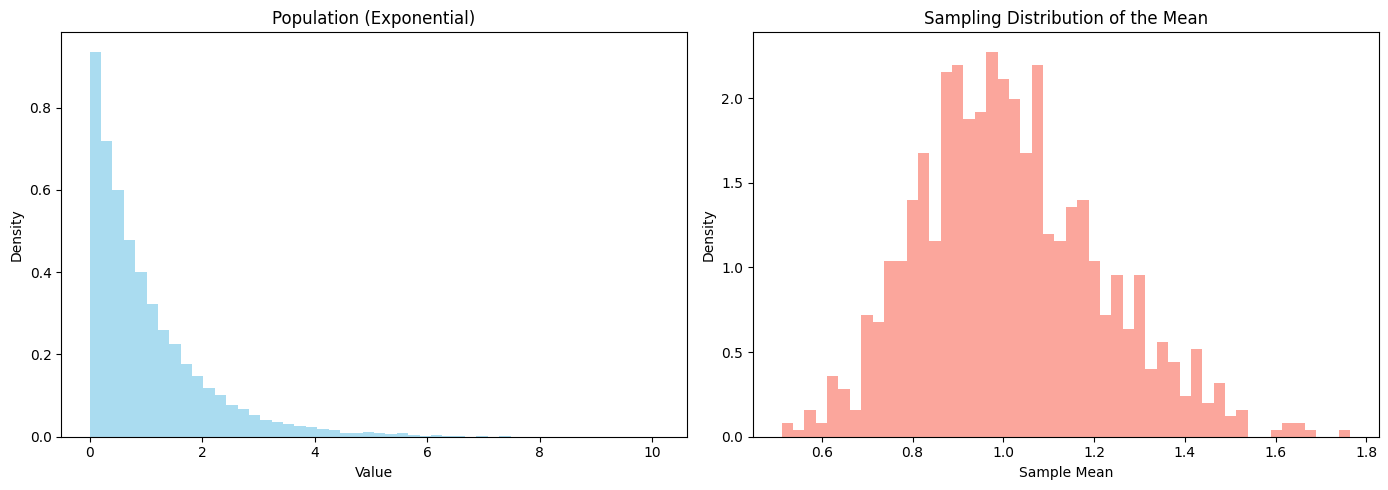

1.622643198536583e-61
1.4619034313597636e-07


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro

population = np.random.exponential(scale=1.0, size=10000)
sample_means = [np.mean(np.random.choice(population, size=30)) for _ in range(1000)]

pop_stat, pop_p = shapiro(population[:5000])
sample_stat, sample_p = shapiro(sample_means)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(population, bins=50, density=True, alpha=0.7, color='skyblue')
axes[0].set_title(f'Population (Exponential)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

axes[1].hist(sample_means, bins=50, density=True, alpha=0.7, color='salmon')
axes[1].set_title(f'Sampling Distribution of the Mean')
axes[1].set_xlabel('Sample Mean')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()
print(pop_p)
print(sample_p)

<ipython-input-5-dc3f79092e70>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


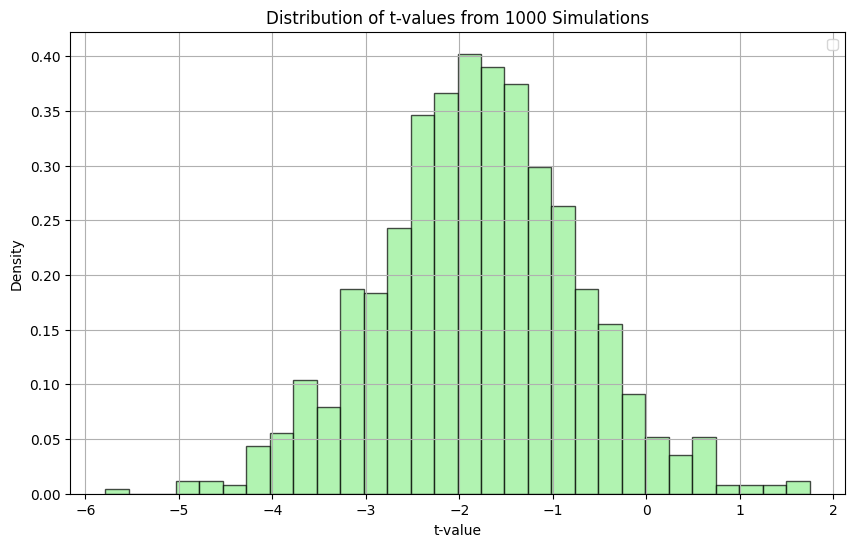

In [5]:
# 1000번의 반복 실험을 통해 t-value를 계산하여 분포 시각화
t_values = []

for _ in range(1000):
    group1 = np.random.normal(loc=0, scale=1, size=30)
    group2 = np.random.normal(loc=0.5, scale=1.2, size=30)
    t_statistic, _ = ttest_ind(group1, group2)
    t_values.append(t_statistic)

# t-value 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(t_values, bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black')

# 세부설정
plt.title('Distribution of t-values from 1000 Simulations')
plt.xlabel('t-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


# DepMap datasets

In [9]:
!wget --no-check-certificate "https://www.dropbox.com/scl/fi/533wpky7dz2kvcjqm4jjx/lec5_data.zip?rlkey=b2cko74izyin5wr05z3d99svw&st=x2rxrzha&dl=0" -O "lec5_data.zip"
!unzip lec5_data.zip

--2025-04-10 12:30:48--  https://www.dropbox.com/scl/fi/533wpky7dz2kvcjqm4jjx/lec5_data.zip?rlkey=b2cko74izyin5wr05z3d99svw&st=x2rxrzha&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6021a71707b7c880019afb2878.dl.dropboxusercontent.com/cd/0/inline/CnicfWJJ_cRWARFlGA2_um9fedLv3dfHqGKtWHISMfCYwqIxUJpuJEfdBm8M3ko87Fq9PMVFN31TatxhftwmHABKlIXb1O-6Wn2Fsigqk1F0beRkiCYNEV6uDDCS1LQMnz2t5ztarBJUQHN8_drx5em9/file# [following]
--2025-04-10 12:30:48--  https://uc6021a71707b7c880019afb2878.dl.dropboxusercontent.com/cd/0/inline/CnicfWJJ_cRWARFlGA2_um9fedLv3dfHqGKtWHISMfCYwqIxUJpuJEfdBm8M3ko87Fq9PMVFN31TatxhftwmHABKlIXb1O-6Wn2Fsigqk1F0beRkiCYNEV6uDDCS1LQMnz2t5ztarBJUQHN8_drx5em9/file
Resolving uc6021a71707b7c880019afb2878.dl.dropboxusercontent.com (uc6021a71707b7c880019afb2878.dl.dropboxusercontent.com)...

In [16]:
import pandas as pd

cellline_df = pd.read_csv("./Model.csv")
cellline_df

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,Available in SRA,NaN,2201.0,SIDM00105,905933.0
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",...,NaN,NaN,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,55.0,SIDM00829,905938.0
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,...,NaN,NaN,NaN,CACO2_LARGE_INTESTINE,NaN,Available in SRA,NaN,NaN,SIDM00891,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",...,NaN,NaN,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,783.0,SIDM00594,907053.0
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,...,NaN,NaN,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,NaN,SIDM00593,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,ACH-003473,PT-fG5tCh,CCLF_PEDS_0013_T,CCLFPEDS0013T,ERMS,Soft Tissue,Rhabdomyosarcoma,Embryonal Rhabdomyosarcoma,ERMS,NaN,...,NaN,NaN,NaN,NaN,HCM-BROD-0006-C49,NaN,NaN,NaN,NaN,NaN
2101,ACH-003474,PT-WxfjG3,CCLF_HNSC_0001_T,CCLFHNSC0001T,HNSC,Head and Neck,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,HNSC,NaN,...,NaN,NaN,NaN,NaN,HCM-BROD-1131-C06,NaN,NaN,NaN,NaN,NaN
2102,ACH-003475,PT-ce6oqw,CCLF_HNSC_0003_T,CCLFHNSC0003T,HNSC,Head and Neck,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,HNSC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2103,ACH-003476,PT-ce6oqw,CCLF_HNSC_0002_T,CCLFHNSC0002T,HNSC,Head and Neck,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,HNSC,NaN,...,NaN,NaN,NaN,NaN,HCM-BROD-1130-C06,NaN,NaN,NaN,NaN,NaN


In [18]:
ess_prob_df = pd.read_csv("./CRISPRGeneDependency.csv", index_col=0)
ess_prob_df

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000001,0.065668,0.015635,0.018194,0.080116,0.027776,0.004321,0.045106,0.053754,0.004370,0.023588,...,0.064946,0.008621,0.005056,0.002127,0.005174,0.161339,0.014115,0.012368,0.006628,0.409237
ACH-000004,0.025267,0.050137,0.050000,0.032089,0.028282,0.091636,0.001559,0.059275,0.003909,0.005066,...,0.121742,0.294430,0.002449,0.009105,0.010306,0.012599,0.304880,0.008154,0.001641,0.021108
ACH-000005,0.076913,0.019836,0.006571,0.011018,0.059735,0.123887,0.006300,0.042264,0.051944,0.016487,...,0.181750,0.211965,0.027067,0.030316,0.020373,0.088972,0.032753,0.030137,0.015747,0.060246
ACH-000007,0.031522,0.047508,0.006059,0.005069,0.016260,0.018866,0.012723,0.090322,0.082053,0.001867,...,0.267304,0.301360,0.017301,0.001322,0.009170,0.034824,0.363788,0.021889,0.178964,0.349167
ACH-000009,0.039600,0.116588,0.016466,0.013633,0.013288,0.086989,0.019045,0.118837,0.021282,0.011256,...,0.335157,0.182601,0.043114,0.002356,0.075201,0.085467,0.652613,0.017909,0.026358,0.271253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-002926,0.051287,0.047941,0.009162,0.005529,0.057342,0.032345,0.032228,0.099910,0.025682,0.004286,...,0.463674,0.751708,0.010001,0.001116,0.098489,0.024442,0.170922,0.007541,0.073935,0.320988
ACH-002928,0.188160,0.087219,0.062521,0.031245,0.146053,0.046314,0.013510,0.015555,0.141084,0.014670,...,0.045569,0.428342,0.002741,0.011294,0.008005,0.016600,0.011255,0.163807,0.053188,0.040570
ACH-003012,0.062732,0.018869,0.007628,0.002783,0.032499,0.057233,0.016252,0.203198,0.017947,0.004439,...,0.159537,0.719778,0.081715,0.003480,0.025234,0.003909,0.102925,0.021411,0.090717,0.189673
ACH-003177,0.030509,0.036156,0.016984,0.006014,0.010666,0.012280,0.003225,0.048263,0.009083,0.008078,...,0.045987,0.584241,0.092351,0.022674,0.028051,0.056920,0.065675,0.088788,0.014752,0.688078


In [19]:
mutation_df = pd.read_csv("./mutations_NAsdropped.csv", index_col=0)
mutation_df

<ipython-input-19-0372716b5ccf>:1: DtypeWarning: Columns (23,25,29,30,31,42,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  mutation_df = pd.read_csv("./mutations_NAsdropped.csv", index_col=0)


,cell_line_display_name,mutation_id,gene_id,depmap_id,chrom,pos,ref,alt,af,ref_count,...,provean_prediction,nmd,vep_somatic,lof_number_of_transcripts_in_gene,vep_impact,oncogene_high_impact,am_class,am_pathogenicity,hotspot,gene
0,RERFLCMS,1,8637,ACH-000062,chr1,818203,G,A,0.240,21,...,NaN,NaN,NaN,NaN,HIGH,False,NaN,NaN,False,FAM87B
1,MAMEL46,2,15526,ACH-001949,chr1,851926,G,A,0.158,15,...,NaN,NaN,NaN,NaN,HIGH,False,NaN,NaN,False,LINC01128
2,BL70,3,34567,ACH-000402,chr1,924510,GC,AA,0.412,21,...,NaN,NaN,NaN,NaN,MODERATE,False,NaN,NaN,False,SAMD11
3,KYSE180,4,34567,ACH-000693,chr1,924657,C,G,0.437,9,...,NaN,NaN,NaN,NaN,MODERATE,False,NaN,NaN,False,SAMD11
4,HCC1569,5,34567,ACH-000930,chr1,924750,C,T,0.625,7,...,NaN,NaN,NaN,NaN,MODERATE,False,NaN,NaN,False,SAMD11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,SNU1040,709974,13947,ACH-000999,chrY,19741856,G,A,0.964,0,...,Damaging,NaN,NaN,NaN,MODERATE,False,likely_pathogenic,0.8388,False,KDM5D
1612,SNU1040,709975,13947,ACH-000999,chrY,19743187,C,T,0.933,0,...,Damaging,NaN,NaN,NaN,MODERATE,False,likely_pathogenic,0.9828,False,KDM5D
1613,SNU1040,709976,33697,ACH-000999,chrY,20761364,A,G,0.600,7,...,NaN,NaN,NaN,NaN,MODERATE,False,likely_benign,0.0841,False,RPS4Y2
1614,MM485,709977,33697,ACH-001973,chrY,20768898,C,T,0.992,0,...,NaN,NaN,NaN,NaN,MODERATE,False,likely_benign,0.2640,False,RPS4Y2


# Example

In [22]:
breast_cancer_cell_df = cellline_df[cellline_df['OncotreeCode']=='BRCA']
breast_cancer_cellline_ids = list(breast_cancer_cell_df['ModelID'].values)
breast_cancer_cellline_ids

['ACH-000017',
 'ACH-000019',
 'ACH-000028',
 'ACH-000117',
 'ACH-000212',
 'ACH-000248',
 'ACH-000258',
 'ACH-000352',
 'ACH-000768',
 'ACH-000849',
 'ACH-000856',
 'ACH-000876',
 'ACH-000910',
 'ACH-000934',
 'ACH-001391',
 'ACH-001392',
 'ACH-001393',
 'ACH-001394',
 'ACH-001396',
 'ACH-002179',
 'ACH-002950',
 'ACH-002951']

In [24]:
breast_mutation_df = mutation_df[mutation_df['depmap_id'].isin(breast_cancer_cellline_ids)]
breast_mutation_df

,cell_line_display_name,mutation_id,gene_id,depmap_id,chrom,pos,ref,alt,af,ref_count,...,provean_prediction,nmd,vep_somatic,lof_number_of_transcripts_in_gene,vep_impact,oncogene_high_impact,am_class,am_pathogenicity,hotspot,gene
32,HCC1428,33,14177,ACH-000352,chr1,961355,T,G,0.619,2,...,Neutral,NaN,NaN,NaN,MODERATE,False,likely_benign,0.1172,False,KLHL17
43,CAL51,44,14177,ACH-000856,chr1,963249,G,A,0.303,22,...,Damaging,NaN,NaN,NaN,MODERATE,False,likely_pathogenic,0.9941,False,KLHL17
172,SKBR3,173,41092,ACH-000017,chr1,1179244,A,T,0.750,11,...,Damaging,NaN,NaN,NaN,MODERATE,False,likely_benign,0.1342,False,TTLL10
173,AU565,174,41092,ACH-000248,chr1,1179244,A,T,0.970,0,...,Damaging,NaN,NaN,NaN,MODERATE,False,likely_benign,0.1342,False,TTLL10
251,MDAMB361,252,186,ACH-000934,chr1,1296248,G,A,0.436,22,...,Damaging,NaN,NaN,NaN,MODERATE,False,likely_pathogenic,0.9983,False,ACAP3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,OCUBM,709045,26072,ACH-002179,chrX,153771551,C,A,0.317,15,...,Neutral,NaN,NaN,NaN,MODERATE,False,likely_benign,0.1687,False,PLXNB3
730,OCUBM,709093,12537,ACH-002179,chrX,153786389,G,T,0.555,8,...,Neutral,NaN,NaN,NaN,MODERATE,False,likely_benign,0.2902,False,IDH3G
988,MDAMB415,709351,18311,ACH-000876,chrX,154031401,C,T,0.250,96,...,Neutral,NaN,0&0&1,NaN,MODERATE,False,NaN,NaN,False,MECP2
1139,SUM229PE,709502,1988,ACH-001394,chrX,154435380,C,G,0.766,171,...,Neutral,NaN,NaN,NaN,MODERATE,False,likely_benign,0.0806,False,ATP6AP1


In [55]:
from scipy.stats import ttest_ind

def find_significant_genes(essentiality_df, control_group, test_group, threshold=0.001):
    genes = essentiality_df.columns
    control_df = essentiality_df.loc[control_group]
    test_df = essentiality_df.loc[test_group]

    significant_genes = []

    for gene in genes:
        control_prob = control_df[gene]
        test_prob = test_df[gene]

        control_mean = control_prob.mean()
        test_mean = test_prob.mean()

        if control_mean < 0.5 and test_mean > 0.5:
            _, p_value = ttest_ind(control_prob, test_prob)

            if p_value < threshold:
                significant_genes.append(gene)

    return significant_genes


lof_mutations_df = breast_mutation_df[breast_mutation_df['likely_lof'] == True]
lof_genes = lof_mutations_df['gene'].unique()
essentiality_cell_lines = ess_prob_df.index.tolist()

for gene, gene_mutation_df in lof_mutations_df.groupby('gene'):
    lof_cell_lines = set(gene_mutation_df['depmap_id']) & set(essentiality_cell_lines)
    non_lof_cell_lines = set(breast_cancer_cellline_ids) - lof_cell_lines
    non_lof_cell_lines &= set(essentiality_cell_lines)

    if len(lof_cell_lines) >= 3:
        candidate_genes = find_significant_genes(
            ess_prob_df,
            control_group=list(non_lof_cell_lines),
            test_group=list(lof_cell_lines)
        )

        print(f'Potential target genes for LOF gene: {gene}')
        print(candidate_genes)

Potential target genes for LOF gene: CLCN3
['APPBP2 (10513)', 'COA4 (51287)', 'CORO6 (84940)', 'DENND2C (163259)', 'H2AC21 (317772)', 'NDUFS3 (4722)', 'TMEM127 (55654)']
Potential target genes for LOF gene: DNAH7
['RIC1 (57589)', 'SLC25A41 (284427)']
Potential target genes for LOF gene: FSIP2
['ACAD9 (28976)', 'COX19 (90639)', 'FASTKD5 (60493)', 'IBA57 (200205)', 'KIAA2013 (90231)', 'LCN6 (158062)', 'MTO1 (25821)', 'NDUFV2 (4729)', 'PDCD6 (10016)', 'PITRM1 (10531)', 'PPRC1 (23082)', 'RTN4IP1 (84816)', 'SLC25A28 (81894)']
Potential target genes for LOF gene: MUC16
['BRD7 (29117)', 'MAPK6 (5597)']
Potential target genes for LOF gene: PTEN
['MZF1 (7593)', 'PIK3CB (5291)', 'TRUB2 (26995)']
Potential target genes for LOF gene: TP53
[]
Potential target genes for LOF gene: TYRO3
['FGFR2 (2263)']
Potential target genes for LOF gene: UNC79
['EXT1 (2131)', 'FGF19 (9965)', 'FRS2 (10818)', 'WSB2 (55884)']


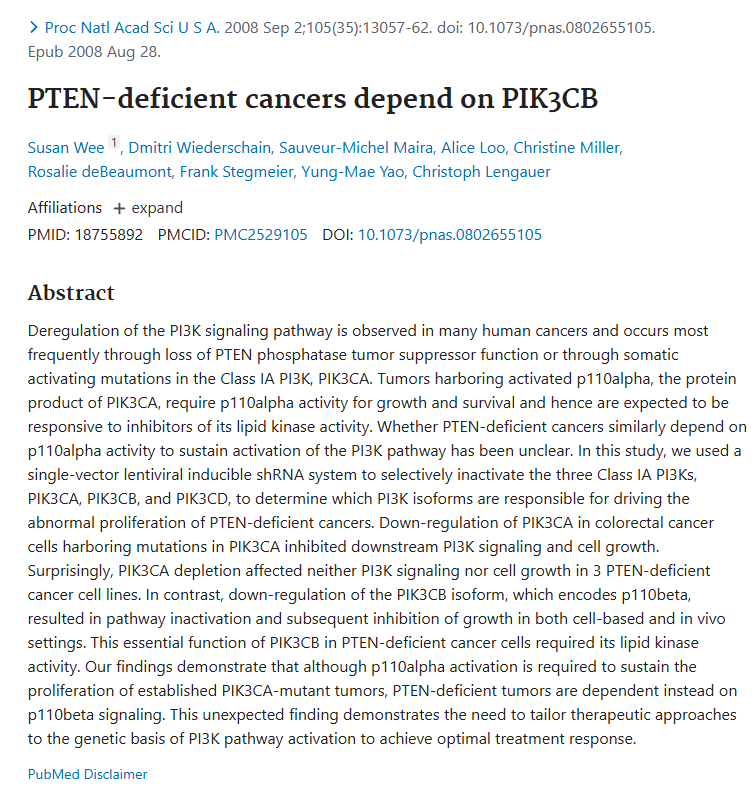